In [3]:
#-------- Import Libraries --------#

import torch
import time
import os
import sys
import random
import pickle
import mlflow
import numpy as np
import pandas as pd
import torch.nn as nn
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import date
from sklearn.metrics import matthews_corrcoef
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F  # All functions that don't have any parameters
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc


In [4]:
modelNameList = ["baseline", "esm-1b_whole", "esm_ASM_whole", "esm-1b_separated"]

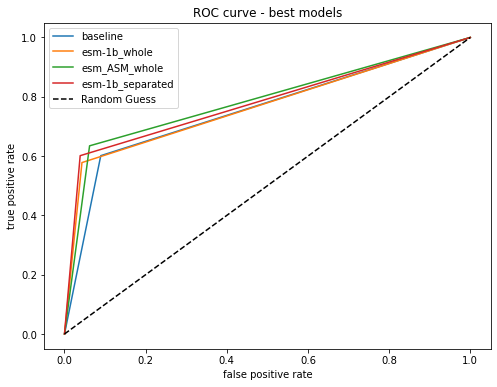

In [7]:
plt.figure(figsize=(8,6))

for i in range (len(modelNameList)):
    
    #Open file
    results = pd.read_csv("{}.csv".format(modelNameList[i]))
    
    #calculate ROC curve values
    fpr, tpr, thres = roc_curve(results['target'], results['pred'])


    # plot roc curve
    plt.plot(fpr, tpr, label=modelNameList[i])

plt.plot([0,1],[0,1], "k--", label='Random Guess')    
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve - best models")
plt.savefig("ROC_curve.png")
plt.show()
    
    